In [1]:
!git clone https://github.com/michaelo-ponteski/isaid-instance-segmentation.git
%cd isaid-instance-segmentation/

Cloning into 'isaid-instance-segmentation'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 41 (delta 12), reused 34 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (41/41), 14.17 KiB | 2.83 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/isaid-instance-segmentation


In [2]:
!pwd

/content/isaid-instance-segmentation


In [3]:
# The following code will only execute
# successfully when compression is complete

import kagglehub

# Download latest version
path = kagglehub.dataset_download("michaeloponteski/isaid-patches")

print("Path to dataset files:", path)

100%|██████████| 41.1G/41.1G [31:28<00:00, 23.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/michaeloponteski/isaid-patches/versions/1


In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [5]:
from datasets.isaid_dataset import iSAIDDataset, visualize_sample
from models.maskrcnn_model import get_maskrcnn_model, MaskRCNNTrainer
from utils.overfit_test import overfit_single_image_test

In [6]:
root_dir = '/root/.cache/kagglehub/datasets/michaeloponteski/isaid-patches/versions/1/iSAID_patches'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = 16

# Load dataset
train_dataset = iSAIDDataset(root_dir, split='train')
val_dataset = iSAIDDataset(root_dir, split='val')

print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}")

Train: 28029, Val: 9512


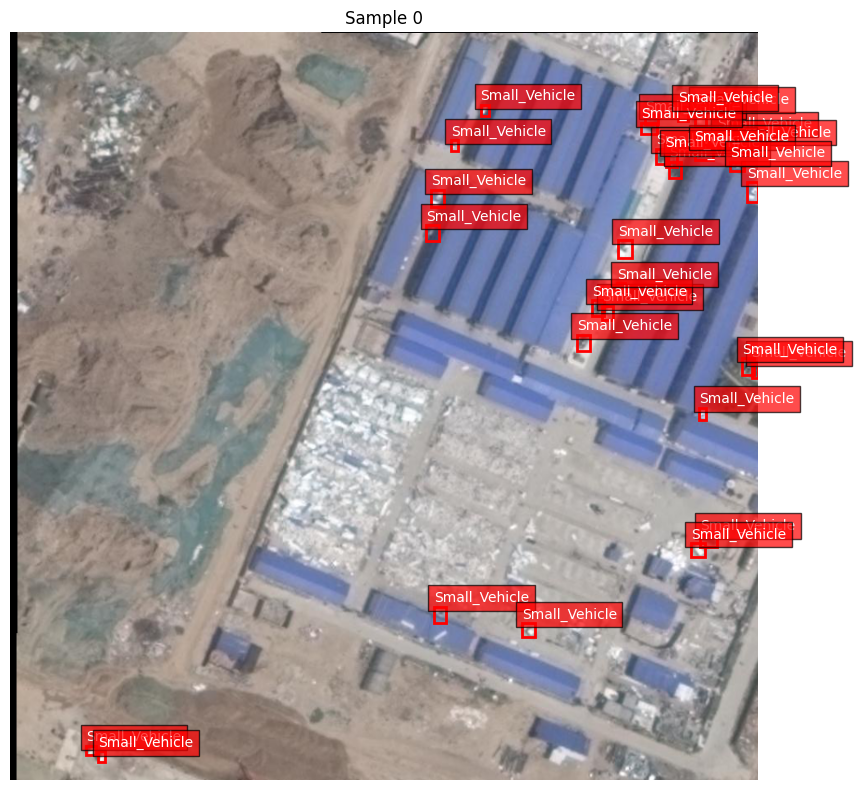

In [7]:
visualize_sample(train_dataset, 0)

In [27]:
model = get_maskrcnn_model(num_classes, pretrained=True)

OVERFIT SINGLE IMAGE TEST

Image shape: torch.Size([3, 800, 800])
Number of instances: 30
Classes: [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

Training for 500 epochs...
Epoch [10/500], Loss: 2.3682
  loss_classifier: 0.3217
  loss_box_reg: 0.8219
  loss_mask: 0.4686
  loss_objectness: 0.5087
  loss_rpn_box_reg: 0.2473
Epoch [20/500], Loss: 1.4596
  loss_classifier: 0.2667
  loss_box_reg: 0.5600
  loss_mask: 0.3729
  loss_objectness: 0.0551
  loss_rpn_box_reg: 0.2049
Epoch [30/500], Loss: 1.0599
  loss_classifier: 0.1509
  loss_box_reg: 0.4053
  loss_mask: 0.2815
  loss_objectness: 0.0803
  loss_rpn_box_reg: 0.1418
Epoch [40/500], Loss: 0.7611
  loss_classifier: 0.1211
  loss_box_reg: 0.2451
  loss_mask: 0.2283
  loss_objectness: 0.0641
  loss_rpn_box_reg: 0.1026
Epoch [50/500], Loss: 0.6852
  loss_classifier: 0.0854
  loss_box_reg: 0.2468
  loss_mask: 0.2306
  loss_objectness: 0.0429
  loss_rpn_box_reg: 0.0795
Epoch [60/500], Loss: 0.643

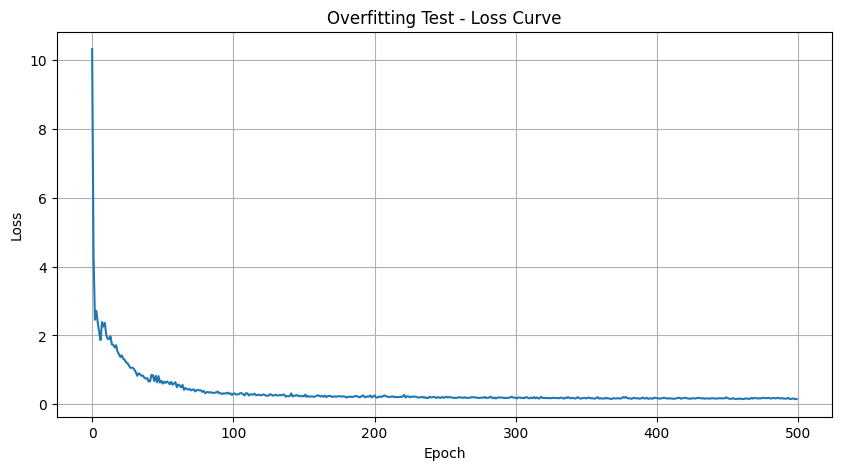

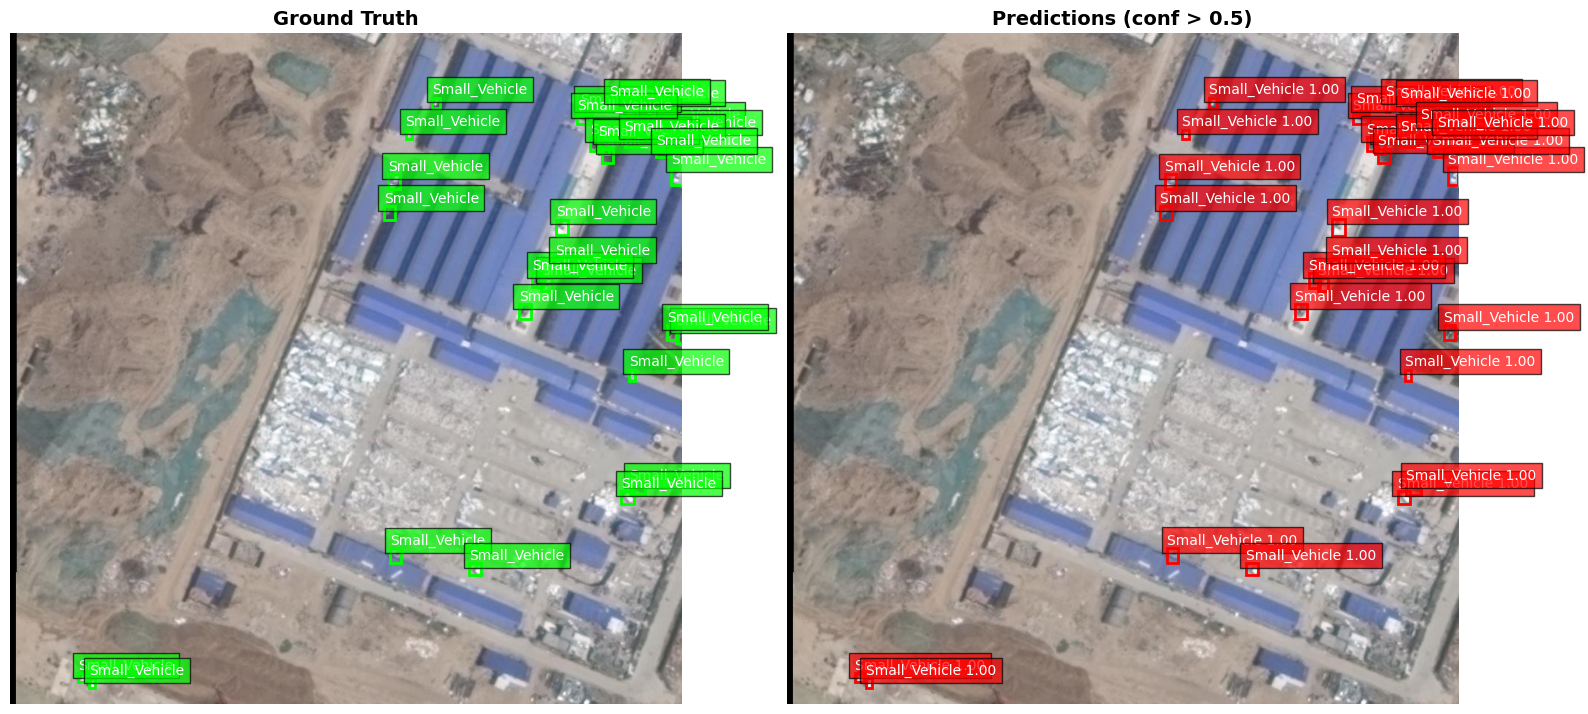


Predictions: 29 objects detected

RESULTS:
Initial Loss: 10.3191
Final Loss: 0.1565
Improvement: 98.48%
✓ SUCCESS: Model successfully overfitted to the image!


In [28]:
losses, preds = overfit_single_image_test(
    model,
    train_dataset,
    idx=0,
    num_epochs=500,
    device=device
)